**2일차 Colab 다루어 보기**
==========================================================================




In [1]:
#구글 드라이브와 Colab 연동

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**colab에서 구글 드라이브 권한 획득**


1.   위 명령어 사용하기
2.   그 후 나오는 URL로 접속한 후, verification code 입력
3.   단, 매번 이 작업을 해줘야 함….(일정 시간 이후엔 끊김)

In [2]:
import os

DIR = '/content/gdrive/MyDrive/pytorch/'

defaultDIR = DIR + 'chapter1/'

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Make forlder ' +  directory)
    except OSError:
        print('Error: Creating directory. ' +  directory)
 



In [3]:
dataDIR = defaultDIR+'data/'
modelDIR = defaultDIR+'models/'

createFolder(dataDIR)
createFolder(modelDIR)


Make forlder /content/gdrive/MyDrive/pytorch/chapter1/data/
Make forlder /content/gdrive/MyDrive/pytorch/chapter1/models/


In [4]:
#기본경로 : '/content/gdrive/MyDrive'
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch/data' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch/chapter1; ls -a;

Chapter1.ipynb	data  models


In [5]:
#내 드라이브 경로 '/content/' 안에 있는 파일 확인 (ls -a)
!cd /content/; ls -a;

.  ..  adc.json  .config  gdrive  sample_data


In [6]:
#내 드라이브 경로 '/content/gdrive/' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/; ls -a;

.file-revisions-by-id  MyDrive	.shortcut-targets-by-id  .Trash-0


In [7]:
#내 드라이브 경로 '/content/gdrive/MyDrive' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive; ls -a;

 1일차.pdf				   'Colab Notebooks'   pytorch
 1일차.pptx				    doc		       공고.zip
 2022011214_isp_winter2022_Proceeding.zip   KMU_Pytorch_특강


In [8]:
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch; ls -a;

chapter0  chapter2  chapter4  chapter6	test.ipynb
chapter1  chapter3  chapter5  github


In [9]:
#원하는 경로에 파일 쓰기 (hello.txt)
with open(defaultDIR+'hello.txt', 'w') as f: # 2번째 파라미터 w(덮어쓰기), a(이어쓰기)
    f.write('Hello Google Drive colab !') 

 #csv로도 많이 뽑는데, 최종 결과 accuracy 낼때 엑셀 사용이 편리하기 때문    



In [10]:
#원하는 경로에 파일 쓰기 (hello.txt)
with open(defaultDIR+'hello.csv', 'w') as f: # 2번째 파라미터 w(덮어쓰기), a(이어쓰기)
    f.write('0.99, 0.98, 0.2, 0.93') 



In [11]:
#내 드라이브 경로 '/content/gdrive/MyDrive/pytorch/data' 안에 있는 파일 확인 (ls -a)
!cd /content/gdrive/MyDrive/pytorch/chapter1; ls -a;
#파일 새로 생김

Chapter1.ipynb	data  hello.csv  hello.txt  models


In [12]:
#파일 읽기 

!cat /content/gdrive/MyDrive/pytorch/chapter1/hello.txt


Hello Google Drive colab !

In [13]:
#원하는 경로에 파일 쓰기 (hello.txt)
with open(defaultDIR+'hello.txt', 'a') as f: # 2번째 파라미터 w(덮어쓰기), a(이어쓰기)
    f.write('\ntest') 



In [14]:
#파일 읽기 

!cat /content/gdrive/MyDrive/pytorch/chapter1/hello.txt


Hello Google Drive colab !
test

2. 파이토치 시작하기
==========================================================================


In [15]:
import torch
import torchvision
import torchtext
print(torch.__version__)

1.10.0+cu111


In [16]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

PyTorch는 `TorchText <https://pytorch.org/text/stable/index.html>`_, `TorchVision <https://pytorch.org/vision/stable/index.html>`_ 및
`TorchAudio <https://pytorch.org/audio/stable/index.html>`_ 와 같이 도메인 특화 라이브러리를 데이터셋과 함께 제공하고 있습니다.
이 튜토리얼에서는 TorchVision 데이터셋을 사용하도록 하겠습니다.

``torchvision.datasets`` 모듈은 CIFAR, COCO 등과 같은 다양한 실제 비전(vision) 데이터에 대한
``Dataset``\ (`전체 목록은 여기 <https://pytorch.org/vision/stable/datasets.html>`_)\ 을 포함하고 있습니다.
이 튜토리얼에서는 FasionMNIST 데이터셋을 사용합니다.
모든 TorchVision ``Dataset`` 은 샘플과 정답을 각각 변경하기 위한 ``transform`` 과 ``target_transform`` 의 두 인자를 포함합니다.



In [17]:
# 공개 데이터셋에서 학습 데이터를 내려받습니다.
training_data = datasets.FashionMNIST(
    root=dataDIR,
    train=True,
    download=True,
    transform=ToTensor(),
)

# 공개 데이터셋에서 테스트 데이터를 내려받습니다.
test_data = datasets.FashionMNIST(
    root=dataDIR,
    train=False,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/gdrive/MyDrive/pytorch/chapter1/data/FashionMNIST/raw



``Dataset`` 을 ``DataLoader`` 의 인자로 전달합니다. 이는 데이터셋을 순회 가능한 객체(iterable)로 감싸고, 자동화된 배치(batch), 샘플링(sampling),
섞기(shuffle) 및 다중 프로세스로 데이터 불러오기(multiprocess data loading)를 지원합니다. 여기서는 배치 크기(batch size)를 64로 정의합니다.
즉, 데이터로더(dataloader) 객체의 각 요소는 64개의 특징(feature)과 정답(label)을 묶음(batch)으로 반환합니다.



In [18]:
batch_size = 64

# 데이터로더를 생성합니다.
train_dataloader = DataLoader(training_data, batch_size=batch_size) 
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


모델 만들기
------------------------------------------------------------------------------------------
PyTorch에서 신경망 모델은 `nn.Module <https://pytorch.org/docs/stable/generated/torch.nn.Module.html>`_ 을
상속받는 클래스(class)를 생성하여 정의합니다. ``__init__`` 함수에서 신경망의 계층(layer)들을 정의하고 ``forward`` 함수에서
신경망에 데이터를 어떻게 전달할지 지정합니다. 가능한 경우 GPU로 신경망을 이동시켜 연산을 가속(accelerate)합니다.



In [19]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module): 
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten() #1차원 이상 데이터 1차원으로 펴주기
        #Sequential은 구석을 묶어주는 기능(따로따로 선언 하지 않고 하나로 묶어서 흐름으로 관리할 수 있음)
        self.linear_relu_stack = nn.Sequential(   
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x): #구조 -> MLP (CNN 아님)
        #위에서 선언한 것을 가져다가 쓰는 부분
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
from torchsummary import summary
modelSummary = model.cuda() 
summary(model, (28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
              ReLU-3                  [-1, 512]               0
            Linear-4                  [-1, 512]         262,656
              ReLU-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.55
Estimated Total Size (MB): 2.58
----------------------------------------------------------------


모델 매개변수 최적화하기
------------------------------------------------------------------------------------------
모델을 학습하려면 `손실 함수(loss function) <https://pytorch.org/docs/stable/nn.html#loss-functions>`_ 와
`옵티마이저(optimizer) <https://pytorch.org/docs/stable/optim.html>`_ 가 필요합니다.



In [21]:
loss_fn = nn.CrossEntropyLoss() # 손실함수 
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #손실함수에서 최적화 길 찾기

In [22]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader): #enumerate 리스트가 있는 경우 순서와 리스트의 값을 전달하는 기능, 
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        # 변화도를 0으로 만들고, 역전파 단계를 수행하고, 가중치를 갱신합니다.
        optimizer.zero_grad() #최적화 함수 기울기를 0으로 초기화, Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문
        loss.backward() #loss 구해서 backpropagation, 역전파 단계
        optimizer.step() # optimizer의 step 함수를 호출하면 매개변수가 갱신됩니다.

        if batch % 100 == 0: #배치 개수에 따라서 정보들 출력 (loss 값, 현재 배치 개수 등)
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") 

In [23]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() #테스트땐 반드시 eval을 켜 놓고 진행 
    test_loss, correct = 0, 0
    with torch.no_grad(): #테스트때는 기울기 구하지 않음 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item() #item(), Pytorch에서 tensor에 저장된 값만을 가져오는 방법

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            #어떤 코드가 이해가 안간다 -> 디버그처럼 하나씩 쪼개서 프린트 해보기 
            # pred.argmax(1)에서 argmax의 파리미터 1은 dim=1임, 0이라면 batch 데이터, 1이라면 하나의 데이터에 대한 결과 벡터
            #print(pred)
            #print(pred.argmax(1))
            #print(pred.argmax(1) == y)
            #print((pred.argmax(1) == y).type(torch.float))

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

학습 단계는 여러번의 반복 단계 (*에폭(epochs)*) 를 거쳐서 수행됩니다. 각 에폭에서는 모델은 더 나은 예측을 하기 위해  매개변수를 학습합니다.
각 에폭마다 모델의 정확도(accuracy)와 손실(loss)을 출력합니다; 에폭마다 정확도가 증가하고 손실이 감소하는 것을 보려고 합니다.



In [24]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.311742  [    0/60000]
loss: 2.295455  [ 6400/60000]
loss: 2.272468  [12800/60000]
loss: 2.267504  [19200/60000]
loss: 2.252183  [25600/60000]
loss: 2.223742  [32000/60000]
loss: 2.221290  [38400/60000]
loss: 2.200576  [44800/60000]
loss: 2.194622  [51200/60000]
loss: 2.171240  [57600/60000]
Test Error: 
 Accuracy: 51.0%, Avg loss: 2.156834 

Epoch 2
-------------------------------
loss: 2.163276  [    0/60000]
loss: 2.154848  [ 6400/60000]
loss: 2.089250  [12800/60000]
loss: 2.115444  [19200/60000]
loss: 2.068831  [25600/60000]
loss: 2.007005  [32000/60000]
loss: 2.030354  [38400/60000]
loss: 1.962258  [44800/60000]
loss: 1.962631  [51200/60000]
loss: 1.903134  [57600/60000]
Test Error: 
 Accuracy: 61.0%, Avg loss: 1.886446 

Epoch 3
-------------------------------
loss: 1.913765  [    0/60000]
loss: 1.888014  [ 6400/60000]
loss: 1.758731  [12800/60000]
loss: 1.812263  [19200/60000]
loss: 1.709297  [25600/60000]
loss: 1.651775  [32000/600

모델 저장하기
------------------------------------------------------------------------------------------
모델을 저장하는 일반적인 방법은 (모델의 매개변수들을 포함하여) 내부 상태 사전(internal state dictionary)을
직렬화(serialize)하는 것입니다.



In [25]:
torch.save(model.state_dict(), modelDIR+"model_chapter1.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


모델 불러오기
------------------------------------------------------------------------------------------

모델을 불러오는 과정에는 모델 구조를 다시 만들고 상태 사전을 모델에 불러오는 과정이 포함됩니다.



In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load(modelDIR+"model_chapter1.pth"))

<All keys matched successfully>

In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

#model = model.cpu() #GPU에 있던 것을 CPU로 옮겨주는 작업 이전 라인이 없는 경우 필요함
model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


In [ ]:
model.eval()
predicList = []
ytestList = []
for i in range(len(test_data)) :
    x = test_data[i][0]
    with torch.no_grad():
        pred = model(x)
        predicList.append(pred[0].argmax(0))
        ytestList.append(test_data[i][1])

In [ ]:
totalNum = len(test_data)
for i in range(len(test_data)) :
    if predicList[i] != ytestList[i] :
        totalNum -= 1


In [ ]:
testAccuracy = totalNum/len(test_data) * 100

print(f'total test accuracy "{testAccuracy}" %')

total test accuracy "64.22" %


Confusion matrix
------------------------------------------------------------------------------------------

저장된 결과로 Confusion matrix 만들기


In [ ]:
import os
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools    
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd                     
import seaborn as sns
from collections import defaultdict
import numpy as np


In [ ]:
labels = classes
resultstr = []
for i in predicList:
    #print(i)
    resultstr.append(labels[i])
y_teststr = []
for i in ytestList:
    #print(i)
    y_teststr.append(labels[i])    

In [ ]:
cm = confusion_matrix(y_teststr,resultstr,labels=labels)

In [ ]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, png_output=None, title='Confusion matrix', pngname='confusion_matrix.png', fontsize=20, figsize=10):
    fontsizeplus = 10
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    f = plt.figure(figsize=(figsize, figsize))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=fontsize+fontsizeplus)
    #plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names,fontsize=fontsize)
        plt.yticks(tick_marks, target_names,fontsize=fontsize)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize=fontsize)
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontsize=fontsize)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=fontsize+fontsizeplus)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass),fontsize=fontsize+fontsizeplus)
       
    ax = plt.gca()    
    im = ax.imshow(cm, cmap=cmap)
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.05)
    cb=plt.colorbar(cax=cax)
    cb.ax.tick_params(labelsize=fontsize)
    
    
    if png_output is not None:
        os.makedirs(png_output, exist_ok=True)
        pngname = 'model_chapter0_'+cmap+'_confusion_matrix.png'
        print(os.path.join(png_output,pngname))
        f.savefig(os.path.join(png_output,pngname), bbox_inches='tight')
        
    plt.show()

In [ ]:
cmap = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 
'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 
'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 
'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn',
'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r',
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r',
'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno',
'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r',
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r',
'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10',
'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

/content/gdrive/MyDrive/pytorch/chapter1/models/model_chapter0_Blues_confusion_matrix.png


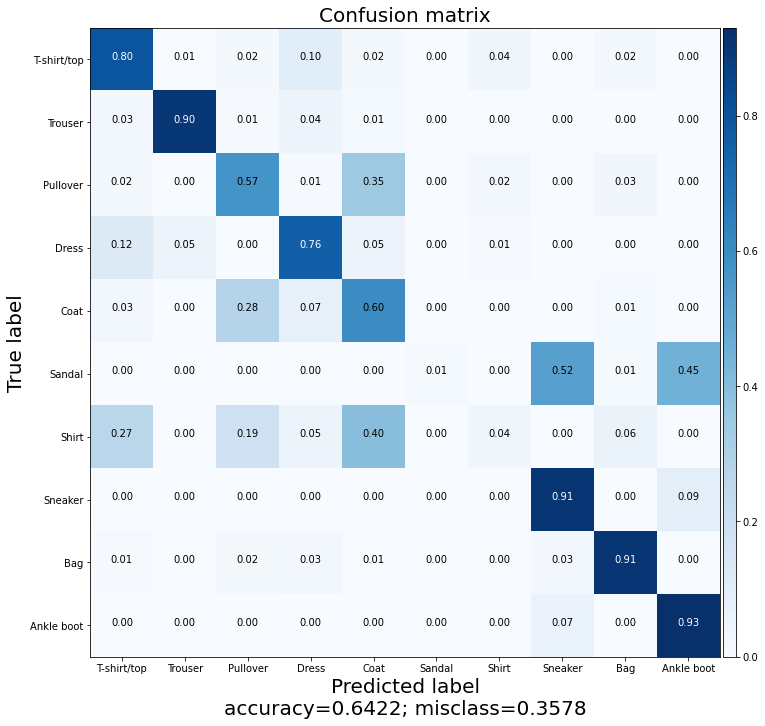

In [ ]:
cMap= 'Blues'
pngName = 'model_chapter0_'+cMap+'_confusion_matrix.png'

plot_confusion_matrix(cm, target_names=labels, cmap=cMap, normalize=True, labels=True, png_output=modelDIR, pngname=pngName, title='Confusion matrix',fontsize=10, figsize=10)